In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.7 MB/s eta 0:00:00


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from catboost import CatBoostClassifier
import time
from sklearn.manifold import TSNE

In [2]:
data = pd.read_csv("/content/drive/My Drive/spam_Emails_data.csv")

In [3]:
data = data[0:100000]

In [4]:
data.isnull().sum()

label    0
text     1
dtype: int64

In [5]:
data = data.dropna(subset = ['label', 'text']).reset_index(drop = True)

In [6]:
data['text'] = data['text'].str.lower()
data['label'] = LabelEncoder().fit_transform(data['label'])

X = data['text']
Y = data['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [7]:
vectorizer = TfidfVectorizer()

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [8]:
sc = StandardScaler(with_mean=False)

X_train_scaled = sc.fit_transform(X_train_vectorized)
X_test_scaled = sc.transform(X_test_vectorized)

In [13]:
start_time = time.time()
model = CatBoostClassifier(iterations=200, learning_rate=0.01, depth=6, l2_leaf_reg=3, early_stopping_rounds=10)
model.fit(X_train_scaled, Y_train)
end_time = time.time()

# Calculate training time
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

0:	learn: 0.6869191	total: 10.6s	remaining: 35m 9s
1:	learn: 0.6807183	total: 19.3s	remaining: 31m 49s
2:	learn: 0.6753704	total: 25.6s	remaining: 28m 2s
3:	learn: 0.6686200	total: 33.7s	remaining: 27m 31s
4:	learn: 0.6627640	total: 40.6s	remaining: 26m 23s
5:	learn: 0.6574738	total: 48.9s	remaining: 26m 20s
6:	learn: 0.6521008	total: 55.3s	remaining: 25m 25s
7:	learn: 0.6470855	total: 1m 2s	remaining: 25m 6s
8:	learn: 0.6418959	total: 1m 10s	remaining: 24m 49s
9:	learn: 0.6365562	total: 1m 17s	remaining: 24m 24s
10:	learn: 0.6310706	total: 1m 24s	remaining: 24m 14s
11:	learn: 0.6262703	total: 1m 31s	remaining: 23m 45s
12:	learn: 0.6215972	total: 1m 39s	remaining: 23m 57s
13:	learn: 0.6169697	total: 1m 46s	remaining: 23m 33s
14:	learn: 0.6120639	total: 1m 54s	remaining: 23m 29s
15:	learn: 0.6071891	total: 2m	remaining: 23m 5s
16:	learn: 0.6029406	total: 2m 8s	remaining: 23m 5s
17:	learn: 0.5992097	total: 2m 14s	remaining: 22m 44s
18:	learn: 0.5952152	total: 2m 23s	remaining: 22m 43s
19

Accuracy: 0.88745
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89     10603
           1       0.84      0.94      0.89      9397

    accuracy                           0.89     20000
   macro avg       0.89      0.89      0.89     20000
weighted avg       0.89      0.89      0.89     20000



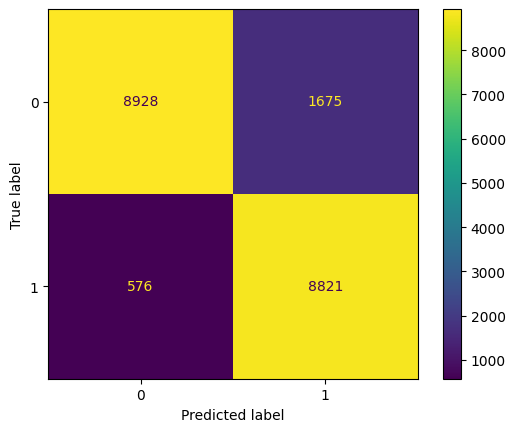

In [14]:
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(Y_test, y_pred)
conf_m = confusion_matrix(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

print(f"Accuracy: {accuracy}")

print(f"Classification Report:")
print(report)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_m, display_labels=model.classes_)
disp.plot()
plt.show()

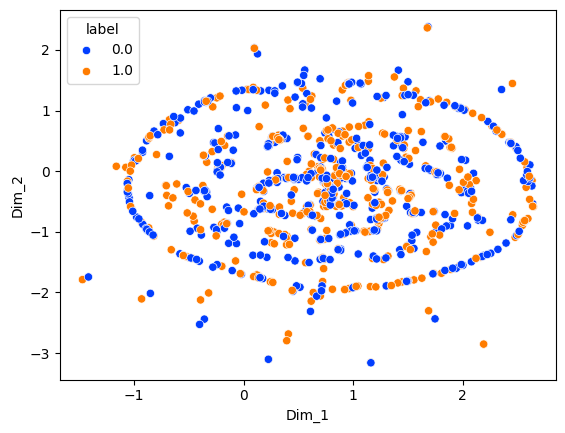

In [19]:
labels = data['label']
data_1000 = X_train_scaled[0:1000, :]
labels_1000 = labels[0:1000]

model1 = TSNE(n_components = 2, random_state = 0, init = 'random')
# configuring the parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations
# for the optimization = 1000

tsne_data = model1.fit_transform(data_1000)

# creating a new data frame which
# help us in plotting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data, columns =("Dim_1", "Dim_2", "label"))

# Plotting the result of tsne
sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2', hue='label', palette="bright")
plt.show()

0:	learn: 0.6928319	total: 777ms	remaining: 2m 34s
1:	learn: 0.6925106	total: 1.48s	remaining: 2m 26s
2:	learn: 0.6921873	total: 2.31s	remaining: 2m 31s
3:	learn: 0.6920126	total: 2.98s	remaining: 2m 25s
4:	learn: 0.6917513	total: 3.53s	remaining: 2m 17s
5:	learn: 0.6914523	total: 4.02s	remaining: 2m 10s
6:	learn: 0.6912208	total: 4.48s	remaining: 2m 3s
7:	learn: 0.6909537	total: 5.04s	remaining: 2m
8:	learn: 0.6907445	total: 5.52s	remaining: 1m 57s
9:	learn: 0.6905320	total: 6.26s	remaining: 1m 59s
10:	learn: 0.6903704	total: 6.75s	remaining: 1m 56s
11:	learn: 0.6900813	total: 7.19s	remaining: 1m 52s
12:	learn: 0.6897333	total: 7.65s	remaining: 1m 50s
13:	learn: 0.6892692	total: 8.16s	remaining: 1m 48s
14:	learn: 0.6888723	total: 8.61s	remaining: 1m 46s
15:	learn: 0.6885788	total: 9.08s	remaining: 1m 44s
16:	learn: 0.6884016	total: 9.55s	remaining: 1m 42s
17:	learn: 0.6881653	total: 10.1s	remaining: 1m 41s
18:	learn: 0.6879447	total: 10.5s	remaining: 1m 40s
19:	learn: 0.6876906	total:

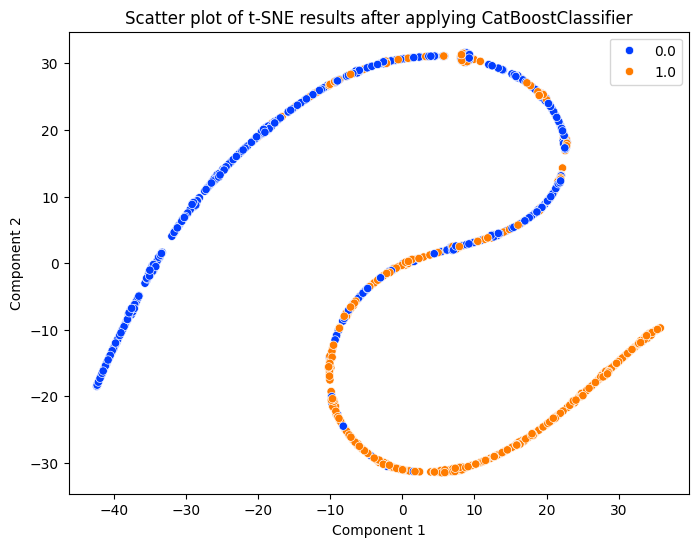

In [20]:
model2 = CatBoostClassifier(iterations=200, learning_rate=0.01, depth=6, l2_leaf_reg=3, early_stopping_rounds=10)
model2.fit(data_1000, labels_1000)

# Get the model's predictions or transformed features (replace with your features)
transformed_data = model2.predict_proba(data_1000)

# Configure and fit t-SNE with init="random"
tsne_model = TSNE(n_components=2, random_state=0, init='random')
tsne_data = tsne_model.fit_transform(transformed_data)

# Create a new DataFrame for the result
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Plotting the result of t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2', hue='label', palette="bright")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Scatter plot of t-SNE results after applying CatBoostClassifier")
plt.legend()
plt.show()